# Problem 30

In [1]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f_neko:
    for line in f_neko:
        if line == '\n':
            continue
        if line == 'EOS\n':
            if morphs != []:
                sentences.append(morphs)
            morphs = []
            continue
        pair = line.split('\t')
        if len(pair) != 2:
            continue
        surface, attrs = pair
        if surface == '':
            continue
        attrs = attrs.split(',')
        morph = {'surface': surface, 'base': attrs[6], 'pos': attrs[0], 'pos1': attrs[1]}
        morphs.append(morph)
print(sentences[:20])

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}], [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}], [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}], [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base'

# Problem 31

In [2]:
verbs_surface = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verbs_surface.add(morph['surface'])
print(len(verbs_surface))
print(list(verbs_surface)[:10])

3893
['始め', '致そ', '切り抜ける', 'からかう', '沈めろ', '恐れ入る', '裏返し', '誂える', '含まっ', 'すり抜け']


# Problem 32

In [3]:
verbs_basic = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verbs_basic.add(morph['base'])
print(len(verbs_basic))
print(list(verbs_basic)[:10])

2300
['切り抜ける', 'からかう', '省く', '禁じる', '恐れ入る', '吸取る', '誂える', '成す', 'とれる', '画く']


# Problem 33

In [4]:
nouns_BofA = set()
for sentence in sentences:
    for morph_idx in range(2, len(sentence)):
        if sentence[morph_idx-2]['pos'] == '名詞' and sentence[morph_idx-1]['surface'] == 'の' and sentence[morph_idx]['pos'] == '名詞':
            nouns_BofA.add(sentence[morph_idx-2]['surface'] + 'の' + sentence[morph_idx]['surface'])
print(len((nouns_BofA)))
print(list(nouns_BofA)[:10])

4924
['君の表情', '運動の妨害', '馬の糞', '壁の隙', '本意の気味', '書斎の中', '小牛のチャップ', '主人の口', '僧の癖', 'さんの前']


# Problem 34

In [5]:
seq_nouns = set()
for sentence in sentences:
    morph_idx = 0
    seq_temp = ''
    while morph_idx < len(sentence)-1:
        if sentence[morph_idx]['pos'] == '名詞':
            if sentence[morph_idx+1]['pos'] == '名詞':
                seq_temp += sentence[morph_idx]['surface']
            elif sentence[morph_idx+1]['pos'] != '名詞' and seq_temp != '':
                seq_temp += sentence[morph_idx]['surface']
                seq_nouns.add(seq_temp)
                seq_temp = ''
        morph_idx += 1
print(len(seq_nouns))
print(list(seq_nouns)[:10])

4454
['綿畠', '山羊髯', '——こっち', '愚猫', 'アンドレア・デル・サルト事件', '実用上', '二寸', 'うそつき', '一輪', '女房なんど']


# Problem 35

In [6]:
word_count_dict = {}
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '記号':
            continue
        surface = morph['surface']
        if not surface in word_count_dict:
            word_count_dict[surface] = 1
        else:
            word_count_dict[surface] += 1

ranking = []
for k, v in word_count_dict.items():
    ranking.append((v, k))
ranking = list(reversed(sorted(ranking)))
print(ranking[:10])

[(9194, 'の'), (6868, 'て'), (6420, 'は'), (6243, 'に'), (6071, 'を'), (5508, 'と'), (5337, 'が'), (3988, 'た'), (3806, 'で'), (2479, 'も')]


# Problem 36

In [7]:
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()

<BarContainer object of 10 artists>

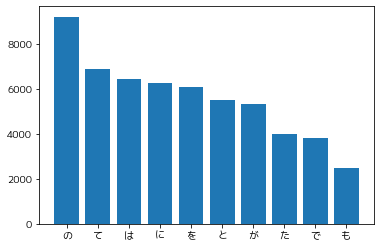

In [8]:
occur_top10 = ranking[:10]
words = list(map(lambda e: e[1], occur_top10))
vals = list(map(lambda e: e[0], occur_top10))
plt.bar(words, vals)

# Problem 37

[(59, '事'), (58, '吾輩'), (55, 'の'), (40, '人間'), (36, 'もの'), (34, 'よう'), (22, '主人'), (19, '人'), (19, '一'), (15, '君')]


<BarContainer object of 10 artists>

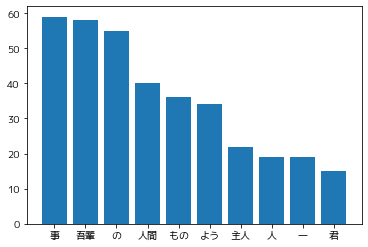

In [15]:
neko_co_occurence = {}
for sentence in sentences:
    surfaces = [morph['surface'] for morph in sentence]
    if '猫' in surfaces:
        for morph in sentence:
            surface = morph['surface']
            if surface != '猫' and morph['pos'] == '名詞':
                if not surface in neko_co_occurence:
                    neko_co_occurence[surface] = 1
                else:
                    neko_co_occurence[surface] += 1

ranking = []
for k, v in neko_co_occurence.items():
    ranking.append((v, k))
ranking = list(reversed(sorted(ranking)))
print(ranking[:10])

occur_top10 = ranking[:10]
words = list(map(lambda e: e[1], occur_top10))
vals = list(map(lambda e: e[0], occur_top10))
plt.bar(words, vals)